170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 126ms/step - accuracy: 0.2857 - loss: 2.0906 - val_accuracy: 0.4826 - val_loss: 1.4630
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.4540 - loss: 1.5291 - val_accuracy: 0.5656 - val_loss: 1.2343
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.5182 - loss: 1.3565 - val_accuracy: 0.6078 - val_loss: 1.1102
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.5688 - loss: 1.2231 - val_accuracy: 0.6046 - val_loss: 1.1589
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.5948 - loss: 1.1525 - val_accuracy: 0.6190 - val_loss: 1.1395
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6198 - loss: 1.0826 - val_accuracy: 0.6503 - val_loss: 1.0329
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6357 - loss: 1.0347 - val_accuracy: 0.6957 - val_loss: 0.8815
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 122ms/step - accuracy: 0.6556 - loss:

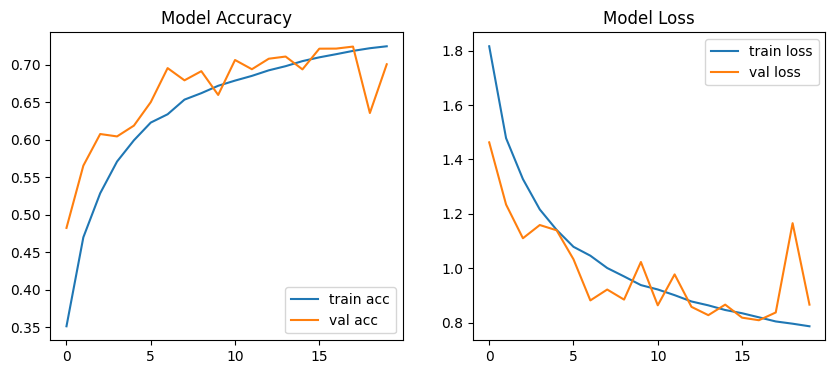

In [1]:
# ======================================================
# Project 1: CNN for CIFAR-10 Image Classification
# ======================================================

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Load and Preprocess Data
# ------------------------------------------------------
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train = y_train.flatten()
y_test = y_test.flatten()

# ------------------------------------------------------
# 2. Define CNN Model
# ------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# ------------------------------------------------------
# 3. Compile Model
# ------------------------------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ------------------------------------------------------
# 4. Train Model
# ------------------------------------------------------
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# ------------------------------------------------------
# 5. Evaluate Model
# ------------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# ------------------------------------------------------
# 6. Plot Accuracy & Loss
# ------------------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.show()
